In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

In [5]:
#Train data will be loaded
metadata_df = pd.read_csv('train/hwg_metadata.csv')
measurements_df = pd.read_csv("train/measurements.csv")

In [6]:
metadata_df.head()

,subject_id,gender,height_cm,weight_kg
0,AhfyGaD1BKo0-u6PeQk2oI-Bw5l0XxpAqNroFuZuy0I,female,160.00,92.4
1,E8tDQ5IgdBwbjLIXu7GwcupEHYbi0eB18YNcsgsSbP8,female,175.75,102.8
2,59bc2767681516389ccf45f9,male,174.80,106.9
3,nRatvgqbYTN77typTgGm4bAurxzpvf5nYg2Mb3gdh8c,male,181.50,111.8
4,fkq68ww6bdyKT16FavI1x_G-u7YZ9SoT1GNMUTSJUek,female,161.60,93.0


In [7]:
measurements_df.head()

,subject_id,ankle,arm-length,bicep,calf,chest,forearm,height,hip,leg-length,shoulder-breadth,shoulder-to-crotch,thigh,waist,wrist
0,-494U-YoXOD8e8gkCuyaRLn4MLo5P8Dm2B1s59WBGdg,24.343954,52.902378,33.294395,38.709511,102.526024,27.599094,177.610992,108.047134,81.736435,35.915691,67.891273,57.872795,92.286171,16.709131
1,-5OHO2b5mRDY1rvAf07sYYtekEEX7ViEGmvRr7l4tfc,22.001783,46.763233,28.288971,35.649963,99.253395,24.813375,164.379623,92.128685,75.127258,33.848778,60.541386,52.418320,87.307899,15.192038
2,-5iHTazqnmWBsnUY6ymoCw1kORMymRDaUla1eNOjgvI,26.565006,53.288597,30.800959,39.854950,102.391273,27.719795,183.718842,106.044121,84.055527,37.856457,72.004379,52.934086,96.596413,17.936598
3,-60o95b9oEE83BDV3GpsAVPA4TFvxuPPqtXEY5PApy8,24.779566,49.077751,34.613113,38.104267,111.164070,28.550409,169.059113,109.529465,74.310234,38.197800,68.536713,58.656673,103.395119,17.029860
4,-67TrwlJ3GSsqPeHaa2Nb0iQ-BKZfIx4ERysQPZ0-SY,20.788853,42.229557,24.527142,29.181356,93.627777,21.979038,146.516632,87.134102,67.269859,31.659197,52.697277,41.844944,74.400856,15.120061


In [8]:
# Metadata and measurement data merged with using subject_id 
merged_df = pd.merge(measurements_df, metadata_df, on='subject_id')

In [9]:
#Unnecessesary fields removed
cleaned_df = merged_df.drop(['height_cm', 'subject_id'], axis=1)

In [10]:
cleaned_df.head()

,ankle,arm-length,bicep,calf,chest,forearm,height,hip,leg-length,shoulder-breadth,shoulder-to-crotch,thigh,waist,wrist,gender,weight_kg
0,24.343954,52.902378,33.294395,38.709511,102.526024,27.599094,177.610992,108.047134,81.736435,35.915691,67.891273,57.872795,92.286171,16.709131,male,79.6
1,22.001783,46.763233,28.288971,35.649963,99.253395,24.813375,164.379623,92.128685,75.127258,33.848778,60.541386,52.418320,87.307899,15.192038,female,65.0
2,26.565006,53.288597,30.800959,39.854950,102.391273,27.719795,183.718842,106.044121,84.055527,37.856457,72.004379,52.934086,96.596413,17.936598,male,82.9
3,24.779566,49.077751,34.613113,38.104267,111.164070,28.550409,169.059113,109.529465,74.310234,38.197800,68.536713,58.656673,103.395119,17.029860,male,88.7
4,20.788853,42.229557,24.527142,29.181356,93.627777,21.979038,146.516632,87.134102,67.269859,31.659197,52.697277,41.844944,74.400856,15.120061,female,44.2


In [11]:
#Quantative preview of the dataset
cleaned_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ankle,2018.0,24.163830,1.801344,19.242346,22.869590,24.151447,25.373191,32.977467
arm-length,2018.0,49.601913,3.141435,39.386353,47.431293,49.679529,51.695949,59.430515
bicep,2018.0,30.404275,3.829238,19.130898,27.754583,30.261229,32.691576,55.813061
calf,2018.0,37.293739,3.199416,28.268900,35.068767,37.101599,39.247336,55.328609
chest,2018.0,101.745150,10.916209,77.077766,94.146229,101.162025,108.182812,153.940750
forearm,2018.0,26.510009,2.610915,18.881157,24.624268,26.601449,28.249811,39.747761
height,2018.0,172.150009,9.328931,140.860458,165.407078,172.398499,179.008183,197.510193
hip,2018.0,102.312379,9.137897,80.676231,96.191925,101.247993,106.713459,166.851578
leg-length,2018.0,78.327809,4.902461,62.698711,74.948942,78.257668,81.522129,94.486633
shoulder-breadth,2018.0,35.818820,2.699648,28.627943,33.521933,36.269375,37.914997,44.322525


In [12]:
#mean and varience for every feature
mean_var_df = cleaned_df.describe().loc[['mean', 'std']]
mean_var_df = mean_var_df.T
mean_var_df['variance'] = mean_var_df['std']**2
mean_var_df.drop('std', axis=1, inplace=True)

mean_var_df


,mean,variance
ankle,24.163830,3.244840
arm-length,49.601913,9.868612
bicep,30.404275,14.663065
calf,37.293739,10.236261
chest,101.745150,119.163608
forearm,26.510009,6.816877
height,172.150009,87.028955
hip,102.312379,83.501163
leg-length,78.327809,24.034123
shoulder-breadth,35.818820,7.288097


In [13]:
# count of samples and features
num_samples = cleaned_df.shape[0]
num_features = cleaned_df.shape[1]

num_samples, num_features

(2018, 16)

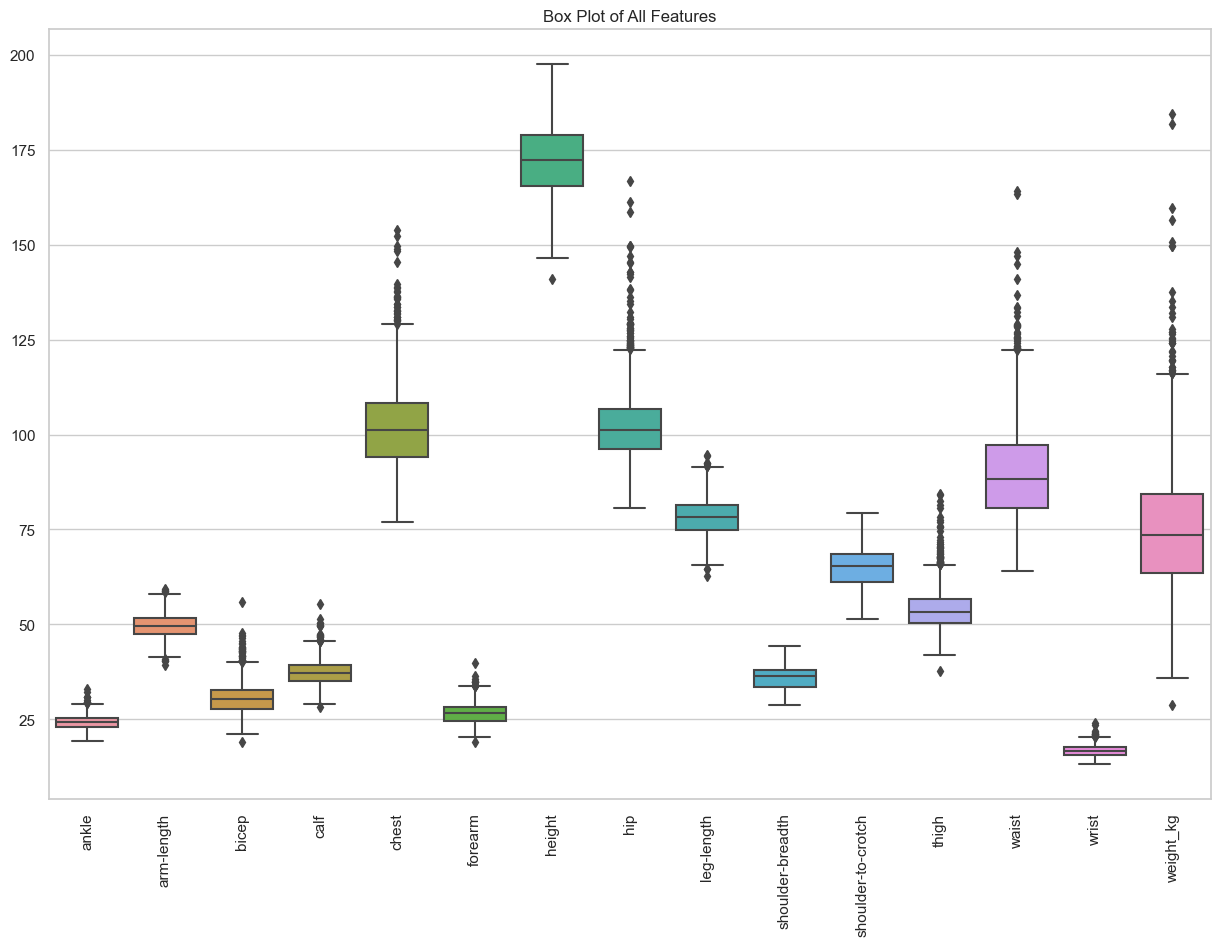

In [14]:
#Box plot for visualiztion
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
sns.boxplot(data=cleaned_df)
plt.xticks(rotation=90)
plt.title('Box Plot of All Features')
plt.show()

# Box plot shows how each feature spreaded amaong in itself.
Boxes seems as expected features with higher varience are beyond the inter-quartile range 

In [15]:
# Encoidng for gender feature
label_encoder = LabelEncoder()
cleaned_df['gender'] = label_encoder.fit_transform(cleaned_df['gender'])

In [16]:
#Weight will be the target and it is dropped from the features
features = cleaned_df.drop('weight_kg', axis=1)
target = cleaned_df['weight_kg']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_features_df.head()

,ankle,arm-length,bicep,calf,chest,forearm,height,hip,leg-length,shoulder-breadth,shoulder-to-crotch,thigh,waist,wrist,gender
0,0.100019,1.050884,0.754938,0.442619,0.071551,0.417231,0.585527,0.627735,0.695461,0.035892,0.604712,0.762512,0.196043,0.021342,0.810441
1,-1.200538,-0.903849,-0.552546,-0.513901,-0.228319,-0.649984,-0.833141,-1.114722,-0.653008,-0.729921,-0.919859,-0.279115,-0.198144,-1.063954,-1.233896
2,1.333322,1.173858,0.103619,0.800723,0.059204,0.463472,1.240410,0.408482,1.168625,0.754966,1.457884,-0.180621,0.537334,0.899445,0.810441
3,0.341905,-0.166896,1.099404,0.253399,0.863052,0.781682,-0.331406,0.789993,-0.819705,0.881437,0.738594,0.912207,1.075666,0.250784,0.810441
4,-1.874053,-2.347394,-1.535185,-2.536211,-0.743792,-1.735826,-2.748410,-1.661437,-2.256151,-1.541184,-2.546945,-2.298286,-1.220143,-1.115445,-1.233896


In [17]:
#First three eigenvalues and corresponding eigenvectors identified
cov_matrix = np.cov(scaled_features.T)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

first_three_eigenvalues = sorted_eigenvalues[:3]
first_three_eigenvectors = sorted_eigenvectors[:, :3]

first_three_eigenvalues, first_three_eigenvectors

(array([9.464991  , 2.92246095, 0.8486937 ]),
 array([[ 0.2839113 , -0.04836423, -0.02070557],
        [ 0.20742649, -0.39201842,  0.31345888],
        [ 0.27042787,  0.23592545, -0.07458983],
        [ 0.25684563,  0.20441855,  0.10982214],
        [ 0.27833263,  0.21482682, -0.04582331],
        [ 0.29891868,  0.07078916, -0.2021704 ],
        [ 0.24573758, -0.35019897,  0.21945421],
        [ 0.24770849,  0.30883274,  0.2594344 ],
        [ 0.18778311, -0.38302485,  0.47703634],
        [ 0.28996382, -0.1301082 , -0.29470659],
        [ 0.27930599, -0.23264007, -0.09844311],
        [ 0.23497077,  0.32262289,  0.28365444],
        [ 0.26808395,  0.22710409, -0.01080377],
        [ 0.29071307,  0.0318151 , -0.15045437],
        [ 0.19937933, -0.32081845, -0.54583101]]))

In [18]:
#Coefficient table
coefficients_df = pd.DataFrame(first_three_eigenvectors, columns=['PC1', 'PC2', 'PC3'], index=features.columns)
coefficients_df

,PC1,PC2,PC3
ankle,0.283911,-0.048364,-0.020706
arm-length,0.207426,-0.392018,0.313459
bicep,0.270428,0.235925,-0.074590
calf,0.256846,0.204419,0.109822
chest,0.278333,0.214827,-0.045823
forearm,0.298919,0.070789,-0.202170
height,0.245738,-0.350199,0.219454
hip,0.247708,0.308833,0.259434
leg-length,0.187783,-0.383025,0.477036
shoulder-breadth,0.289964,-0.130108,-0.294707


## Scree Graph shows the plot of Eigenvalues vs Number of components. 
In the X axis we can see the number of eigen values which represents Principal components
In the Y axis we see the Sorted eigen values which correspond to the varience explained by each principal component 

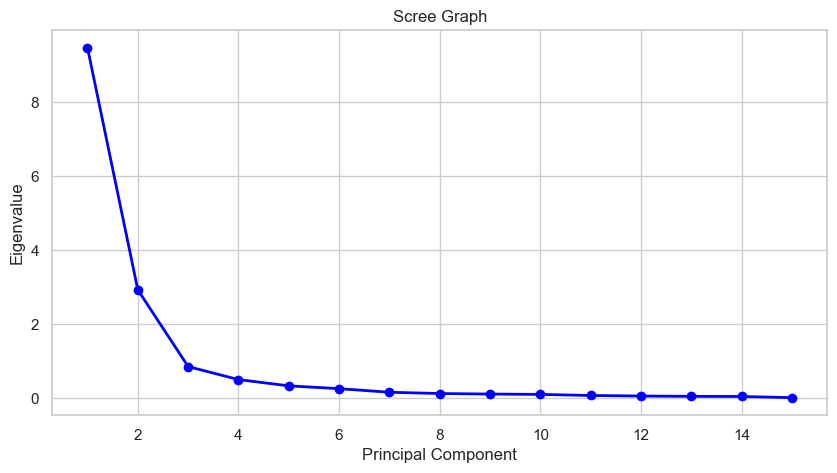

In [31]:
# Scree Graph visualiztion
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(sorted_eigenvalues) + 1), sorted_eigenvalues, 'o-', linewidth=2, color='blue')
plt.title('Scree Graph')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

### We can see that there is no significant decrase in the curve after component 3

# Cumulative Explained Variance Ratio Graph
In the X axis we will see the number of component.
In the y axis we will see the cumulative proportion of total variance

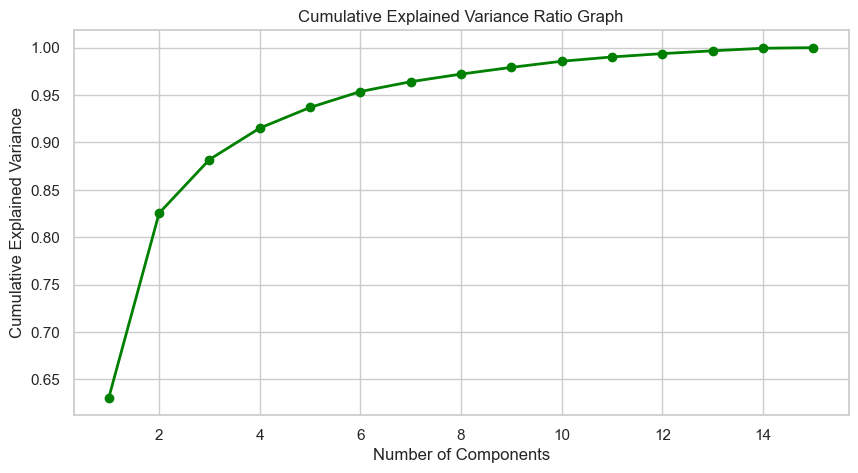

In [22]:
explained_variance_ratio = sorted_eigenvalues / sorted_eigenvalues.sum()
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, 'o-', linewidth=2, color='green')
plt.title('Cumulative Explained Variance Ratio Graph')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

plt.grid(True)
plt.show()

#### We can see that rate of increase is slowed down after firs 2 component and contrubition of the remaining components to the cumulative variance so slow after 3rd component

#  Dimensionality Reduction

In [25]:
#Reconstruction function with K component
def reconstruct_data(scaled_data, eigenvectors, k):
    top_k_eigenvectors = eigenvectors[:, :k]
    projected_data = np.dot(scaled_data, top_k_eigenvectors)
    reconstructed_data = np.dot(projected_data, top_k_eigenvectors.T)
    return reconstructed_data

## Reconstruction Error vs Number of Components (K)

It will show the trade-ff between dimensionality reduction and information loss

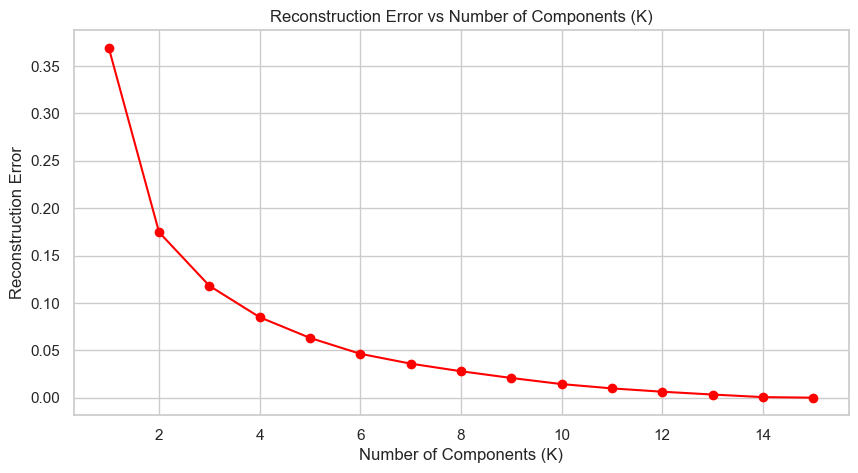

In [26]:
#Reconstruction error vs K graph 
reconstruction_errors = []
num_components = scaled_features.shape[1]  # Total number of components

for k in range(1, num_components + 1):
    reconstructed_data = reconstruct_data(scaled_features, sorted_eigenvectors, k)
    # Calculating the mean squared error between the original and reconstructed data
    mse = np.mean((scaled_features - reconstructed_data) ** 2)
    reconstruction_errors.append(mse)


plt.figure(figsize=(10, 5))
plt.plot(range(1, num_components + 1), reconstruction_errors, 'o-', color='red')
plt.title('Reconstruction Error vs Number of Components (K)')
plt.xlabel('Number of Components (K)')
plt.ylabel('Reconstruction Error')
plt.show()

#### We can see that curve becomes flatten after first 2 component

# Scatter Diagram for First Two Principal Components 
This will show the distribution of the data in 2 dimensional space

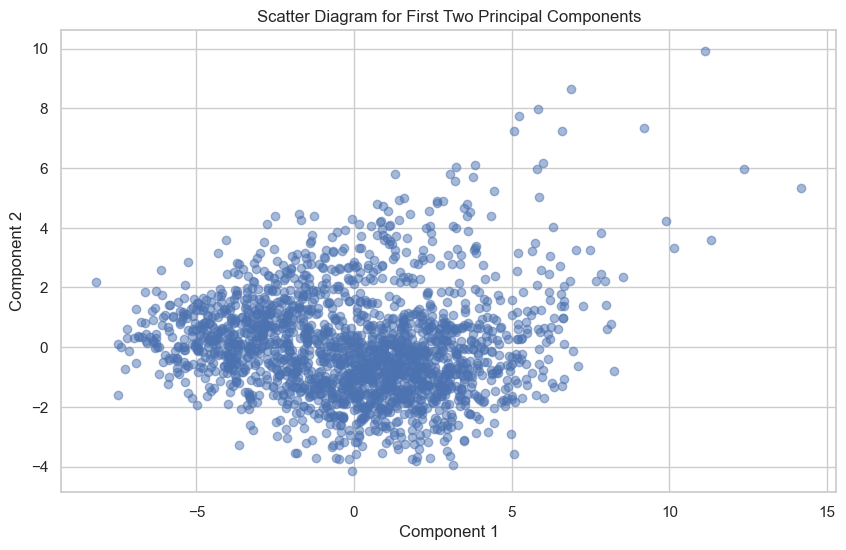

In [29]:
# Creating sctter diagram 
projected_data_2d = np.dot(scaled_features, sorted_eigenvectors[:, :2])
plt.figure(figsize=(10, 6))
plt.scatter(projected_data_2d[:, 0], projected_data_2d[:, 1], alpha=0.5)
plt.title('Scatter Diagram for First Two Principal Components')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()

#### We can see the wider spread along the axis of Component 1 as espected becaues it captures more variance.
#### And, it seems that most of the data could be explained by those components as we can see from the big cluster
#### Outliers shows the datas that can not be easily explained by those first 2 component

In [21]:
average_eigenvalue = np.mean(sorted_eigenvalues)
k_greater_than_average = sum(sorted_eigenvalues > average_eigenvalue)

In [22]:
k_greater_than_average

2

In [23]:
cumulative_variance = np.cumsum(explained_variance_ratio)
k_90_variance = np.argmax(cumulative_variance >= 0.90) + 1

In [24]:
k_90_variance

4

### My visual analysis on the scree graph indicates that K should be 3. But after visualizing other graphs it might be 2 also. 